In [3]:
import pandas as pd 

#### Assumptions in CCA
    1.Values missing completely at random
#### Advantages
    1. Not more chages in data distribution
#### Disadvantages
    1.It can exclude large fraction of data 
    2.When using model in production the model will have no idea how to deal with missing  values if it comes.
#### When to use
    1. Data is in MCAR
    2. If data is missing  less than 5%
    3. We can remove the whole column is 95% data values are not availabein the column.
    

In [4]:
df = pd.read_csv('weatherAUS.csv')

In [5]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [6]:
df.shape

(145460, 23)

In [8]:
df['Location'].shape 

(145460,)

In [9]:
df['Location'].isnull().sum()

0

In [10]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [12]:
df['MinTemp'].isnull().sum()

1485

In [13]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [ ]:
# Applying CCA

In [14]:
df['MinTemp'].isnull().mean()*100

1.0208992162793895

In [15]:
df.isnull().mean()*100

Date              0.000000
Location          0.000000
MinTemp           1.020899
MaxTemp           0.866905
Rainfall          2.241853
Evaporation      43.166506
Sunshine         48.009762
WindGustDir       7.098859
WindGustSpeed     7.055548
WindDir9am        7.263853
WindDir3pm        2.906641
WindSpeed9am      1.214767
WindSpeed3pm      2.105046
Humidity9am       1.824557
Humidity3pm       3.098446
Pressure9am      10.356799
Pressure3pm      10.331363
Cloud9am         38.421559
Cloud3pm         40.807095
Temp9am           1.214767
Temp3pm           2.481094
RainToday         2.241853
RainTomorrow      2.245978
dtype: float64

In [16]:
# Applying CCA where a soecific  column has less than 5% data missing

In [34]:
col=[]
for v in df.columns:
    if df[v].isnull().mean()*100 < 5 and df[v].isnull().mean()*100 > 0:
        col.append(v)
    else:
        pass

In [35]:
col 

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'WindDir3pm',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Temp9am',
 'Temp3pm',
 'RainToday',
 'RainTomorrow']

In [37]:
df[col]

,MinTemp,MaxTemp,Rainfall,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,WNW,20.0,24.0,71.0,22.0,16.9,21.8,No,No
1,7.4,25.1,0.0,WSW,4.0,22.0,44.0,25.0,17.2,24.3,No,No
2,12.9,25.7,0.0,WSW,19.0,26.0,38.0,30.0,21.0,23.2,No,No
3,9.2,28.0,0.0,E,11.0,9.0,45.0,16.0,18.1,26.5,No,No
4,17.5,32.3,1.0,NW,7.0,20.0,82.0,33.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2.8,23.4,0.0,ENE,13.0,11.0,51.0,24.0,10.1,22.4,No,No
145456,3.6,25.3,0.0,N,13.0,9.0,56.0,21.0,10.9,24.5,No,No
145457,5.4,26.9,0.0,WNW,9.0,9.0,53.0,24.0,12.5,26.1,No,No
145458,7.8,27.0,0.0,N,13.0,7.0,51.0,24.0,15.1,26.0,No,No


In [39]:
# how much data after CCA
len(df[col].dropna())/len(df)

0.9252715523167881

In [40]:
new_df = df[col].dropna()

In [41]:
new_df.shape 

(134590, 12)

In [42]:
new_df.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'WindDir3pm', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Temp9am', 'Temp3pm',
       'RainToday', 'RainTomorrow'],
      dtype='object')

(array([2.5100e+02, 2.8400e+03, 1.1548e+04, 2.5157e+04, 3.3181e+04,
        2.8644e+04, 2.0936e+04, 1.0356e+04, 1.6570e+03, 2.0000e+01]),
 array([-8.500e+00, -4.260e+00, -2.000e-02,  4.220e+00,  8.460e+00,
         1.270e+01,  1.694e+01,  2.118e+01,  2.542e+01,  2.966e+01,
         3.390e+01]),
 <BarContainer object of 10 artists>)

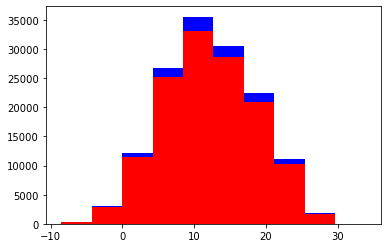

In [47]:
import matplotlib.pyplot as plt 
plt.hist(df['MinTemp'],color="blue")
# after cca
 
plt.hist(new_df['MinTemp'],color="red")

In [49]:
new_df.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'WindDir3pm', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Temp9am', 'Temp3pm',
       'RainToday', 'RainTomorrow'],
      dtype='object')

In [53]:
type(new_df['Rainfall'].dtype())

numpy.dtype

In [54]:
# we can plot hsitogram to check after and before aply cca to check the distribution but only in numerical columns now for cantegorical we see the ration

In [55]:
new_df

,MinTemp,MaxTemp,Rainfall,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,WNW,20.0,24.0,71.0,22.0,16.9,21.8,No,No
1,7.4,25.1,0.0,WSW,4.0,22.0,44.0,25.0,17.2,24.3,No,No
2,12.9,25.7,0.0,WSW,19.0,26.0,38.0,30.0,21.0,23.2,No,No
3,9.2,28.0,0.0,E,11.0,9.0,45.0,16.0,18.1,26.5,No,No
4,17.5,32.3,1.0,NW,7.0,20.0,82.0,33.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...
145454,3.5,21.8,0.0,E,15.0,13.0,59.0,27.0,9.4,20.9,No,No
145455,2.8,23.4,0.0,ENE,13.0,11.0,51.0,24.0,10.1,22.4,No,No
145456,3.6,25.3,0.0,N,13.0,9.0,56.0,21.0,10.9,24.5,No,No
145457,5.4,26.9,0.0,WNW,9.0,9.0,53.0,24.0,12.5,26.1,No,No


In [57]:
df['RainToday'].value_counts()/len(df)

No     0.758415
Yes    0.219167
Name: RainToday, dtype: float64

In [58]:
new_df['RainToday'].value_counts()/len(df)

No     0.719944
Yes    0.205328
Name: RainToday, dtype: float64